## Falling sphere with constant and varying drag

https://folk.ntnu.no/leifh/teaching/tkt4140/._main011.html


http://hplgit.github.io/primer.html/doc/pub/ode2/._ode2-readable000.html#table_of_contents

In [1]:
def euler(func,z0, time):
    """The Euler scheme for solution of systems of ODEs. 
    z0 is a vector for the initial conditions, 
    the right hand side of the system is represented by func which returns 
    a vector with the same size as z0 ."""
    
    z = np.zeros((np.size(time),np.size(z0)))
    z[0,:] = z0

    for i in range(len(time)-1):
        dt = time[i+1]-time[i]
        z[i+1,:]=z[i,:] + np.asarray(func(z[i,:],time[i]))*dt

    return z

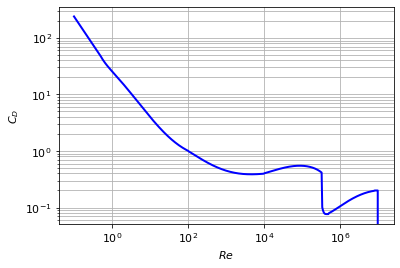

In [2]:
from numpy import logspace, zeros

# Define the function cd_sphere
def cd_sphere(Re):
    "This function computes the drag coefficient of a sphere as a function of the Reynolds number Re."
    # Curve fitted after fig . A -56 in Evett and Liu: "Fluid Mechanics and Hydraulics"
    
    from numpy import log10, array, polyval
    
    if Re <= 0.0:
        CD = 0.0
    elif Re > 8.0e6:
        CD = 0.2
    elif Re > 0.0 and Re <= 0.5:
        CD = 24.0/Re
    elif Re > 0.5 and Re <= 100.0:
        p = array([4.22, -14.05, 34.87, 0.658])
        CD = polyval(p, 1.0/Re) 
    elif Re > 100.0 and Re <= 1.0e4:
        p = array([-30.41, 43.72, -17.08, 2.41])
        CD = polyval(p, 1.0/log10(Re))
    elif Re > 1.0e4 and Re <= 3.35e5:
        p = array([-0.1584, 2.031, -8.472, 11.932])
        CD = polyval(p, log10(Re))
    elif Re > 3.35e5 and Re <= 5.0e5:
        x1 = log10(Re/4.5e5)
        CD = 91.08*x1**4 + 0.0764
    else:
        p = array([-0.06338, 1.1905, -7.332, 14.93])
        CD = polyval(p, log10(Re))
    return CD

# Calculate drag coefficient
Npts = 500
Re = logspace(-1, 7, Npts, True, 10)
CD = zeros(Npts)
i_list = list(range(0, Npts-1))
for i in i_list:
    CD[i] = cd_sphere(Re[i])

# Make plot
from matplotlib import pyplot
# change some default values to make plots more readable 
LNWDT=2; FNT=11
pyplot.rcParams['lines.linewidth'] = LNWDT; pyplot.rcParams['font.size'] = FNT

pyplot.plot(Re, CD, '-b')
pyplot.yscale('log')
pyplot.xscale('log')
pyplot.xlabel('$Re$')
pyplot.ylabel('$C_D$')
pyplot.grid('on', 'both', 'both')
#pyplot.savefig('example_sphere.png', transparent=True)
pyplot.show()

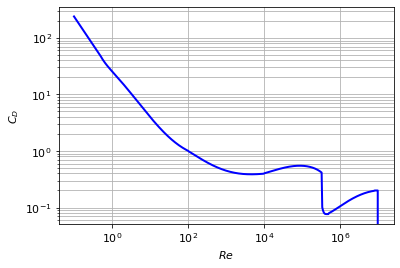

In [3]:
from matplotlib import pyplot
# change some default values to make plots more readable 
LNWDT=2; FNT=11
pyplot.rcParams['lines.linewidth'] = LNWDT; pyplot.rcParams['font.size'] = FNT

pyplot.plot(Re, CD, '-b')
pyplot.yscale('log')
pyplot.xscale('log')
pyplot.xlabel('$Re$')
pyplot.ylabel('$C_D$')
pyplot.grid('on', 'both', 'both')
#pyplot.savefig('example_sphere.png', transparent=True)
pyplot.show()

/tmp/ipykernel_24392/801069980.py:6: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  steps = np.int(np.round(xend/dx, 0)) + 1


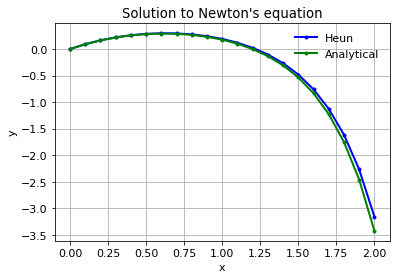

In [5]:
#Velocity of falling sphere using Euler's and Heun's methods.
import numpy as np

xend = 2
dx = 0.1
steps = np.int(np.round(xend/dx, 0)) + 1 
y, x = np.zeros((steps,1), float), np.zeros((steps,1), float)
y[0], x[0] = 0.0, 0.0

for n in range(0,steps-1):
    x[n+1] = (n+1)*dx
    xn = x[n]
    fn = 1 + xn*(xn-3) + y[n]*(1+xn)
    yp = y[n] + dx*fn    
    xnp1 = x[n+1]
    fnp1 = 1 + xnp1*(xnp1-3) + yp*(1+xnp1)
    y[n+1] = y[n] + 0.5*dx*(fn+fnp1)

# Analytical solution
from scipy.special import erf
a = np.sqrt(2)/2
t1 = np.exp(x*(1+ x/2))
t2 = erf((1+x)*a)-erf(a)
ya = 3*np.sqrt(2*np.pi*np.exp(1))*t1*t2 + 4*(1-t1)-x

# plotting
import matplotlib.pylab as plt

# change some default values to make plots more readable 
LNWDT=2; FNT=11
plt.rcParams['lines.linewidth'] = LNWDT; plt.rcParams['font.size'] = FNT

plt.plot(x, y, '-b.', x, ya, '-g.')
plt.xlabel('x')
plt.ylabel('y')

plt.title('Solution to Newton\'s equation')
plt.legend(['Heun', 'Analytical'], loc='best', frameon=False)
plt.grid()
#plt.savefig('newton_heun.png', transparent=True)
plt.show()

In [6]:
def heun(func, z0, time):
    """The Heun scheme for solution of systems of ODEs.
    z0 is a vector for the initial conditions,
    the right hand side of the system is represented by func which returns
    a vector with the same size as z0 ."""

    z = np.zeros((np.size(time), np.size(z0)))
    z[0,:] = z0
    zp = np.zeros_like(z0)

    for i, t in enumerate(time[0:-1]):
        dt = time[i+1] - time[i]
        zp = z[i,:] + np.asarray(func(z[i,:],t))*dt   # Predictor step
        z[i+1,:] = z[i,:] + (np.asarray(func(z[i,:],t)) + np.asarray(func(zp,t+dt)))*dt/2.0 # Corrector step